<a href="https://colab.research.google.com/github/thejayden/IM4483-Mini-Proj/blob/master/im4483_tanjiadian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

!pip install pillow

In [2]:
!git clone https://github.com/thejayden/IM4483-Mini-Proj.git

Cloning into 'IM4483-Mini-Proj'...
remote: Enumerating objects: 25513, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 25513 (delta 2), reused 0 (delta 0), pack-reused 25507
Receiving objects: 100% (25513/25513), 1.01 GiB | 31.66 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (25502/25502), done.


In [3]:
train_cat_dir = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'train', 'cat')
train_dog_dir = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'train', 'dog')
train_cat_images = os.listdir(train_cat_dir)
train_dog_images = os.listdir(train_dog_dir)

category_cat = []
category_dog = []

for image in train_cat_images:
  category_cat.append("0")
df_train = pd.DataFrame({
    'filename': train_cat_images,
    'category': category_cat
})

for image in train_dog_images:
  category_dog.append("1")
df_train2 = pd.DataFrame({
    'filename': train_dog_images,
    'category': category_dog
})

df_train = df_train.append(df_train2)
df_train.shape

(20000, 2)

In [4]:
df_train_sample = df_train.sample(n=20)
print(df_train_sample)

           filename category
9783    dog.648.jpg        1
8818   dog.5585.jpg        1
3397  cat.10791.jpg        0
2298   cat.5322.jpg        0
4666   cat.2952.jpg        0
7198   dog.5190.jpg        1
5902   cat.9232.jpg        0
5874   cat.8194.jpg        0
9201   cat.4615.jpg        0
3068   cat.4650.jpg        0
3004   cat.7538.jpg        0
4496   cat.9797.jpg        0
6647   cat.1118.jpg        0
4444   dog.3636.jpg        1
5229   cat.3780.jpg        0
4681  dog.11501.jpg        1
5145   cat.5203.jpg        0
2569   cat.1038.jpg        0
9084   dog.6710.jpg        1
6842   cat.8826.jpg        0


In [5]:
val_cat_dir = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'val', 'cat')
val_dog_dir = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'val', 'dog')
val_cat_images = os.listdir(val_cat_dir)
val_dog_images = os.listdir(val_dog_dir)

category_cat = []
category_dog = []

for image in val_cat_images:
  category_cat.append("0")
df_val = pd.DataFrame({
    'filename': val_cat_images,
    'category': category_cat
})

for image in val_dog_images:
  category_dog.append("1")
df_val2 = pd.DataFrame({
    'filename': val_dog_images,
    'category': category_dog
})

df_val = df_val.append(df_val2)
df_val.shape

(5000, 2)

In [6]:
df_val_sample = df_val.sample(n=20)
print(df_val_sample)

           filename category
822   cat.10901.jpg        0
339    dog.7208.jpg        1
1261   cat.5605.jpg        0
2073   dog.4693.jpg        1
881   cat.11136.jpg        0
1670   cat.2518.jpg        0
2406   dog.8216.jpg        1
1792   cat.2964.jpg        0
1014   dog.2190.jpg        1
975    dog.9726.jpg        1
1164   dog.4407.jpg        1
2324   cat.7976.jpg        0
1803   cat.5502.jpg        0
1724  cat.11102.jpg        0
677   cat.12320.jpg        0
1785   dog.3668.jpg        1
2256   dog.2216.jpg        1
709    cat.5916.jpg        0
1295   dog.2631.jpg        1
244   cat.10929.jpg        0


Text(0.5, 0, 'Dog = 1, Cat = 0')

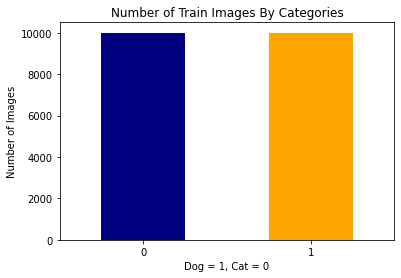

In [7]:
plt1 = df_train['category'].value_counts().plot(kind='bar', color=['navy','orange'], title='Number of Train Images By Categories', rot=0)
plt1.set_ylabel("Number of Images")
plt1.set_xlabel("Dog = 1, Cat = 0")

Text(0.5, 0, 'Dog = 1, Cat = 0')

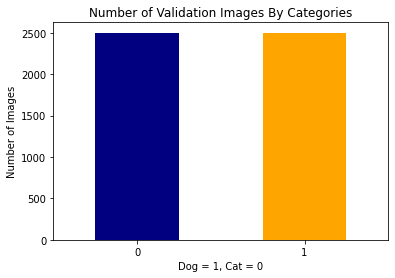

In [8]:
plt2 = df_val['category'].value_counts().plot(kind='bar', color=['navy','orange'], title='Number of Validation Images By Categories', rot=0)
plt2.set_ylabel("Number of Images")
plt2.set_xlabel("Dog = 1, Cat = 0")

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [15]:
train_dest = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'train')
for img in train_cat_images:
  os.rename(train_cat_dir + "/" + img, train_dest + "/" + img)

FileNotFoundError: ignored

In [16]:
for img in train_dog_images:
  os.rename(train_dog_dir + "/" + img, train_dest + "/" + img)

In [17]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    df_train, 
    "./IM4483-Mini-Proj/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

# train_generator = train_datagen.flow_from_dataframe(
#     df_train, 
#     "./IM4483-Mini-Proj/train/dog/", 
#     x_col='filename',
#     y_col='category',
#     class_mode='binary',
#     target_size=(image_size, image_size),
#     batch_size=batch_size
# )

Found 20000 validated image filenames belonging to 2 classes.


         filename category
648  cat.3938.jpg        0


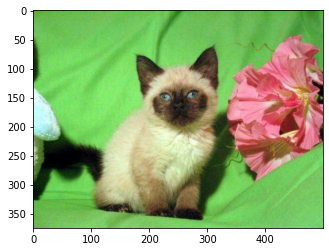

In [52]:
df_train_example = df_train.sample(n=1)
print(df_train_example)

sample = str(df_train_example.iloc[0]['filename'])

# print(sample)
# print("./IM4483-Mini-Proj/train/"+sample)

image = load_img("./IM4483-Mini-Proj/train/"+sample)
plt.imshow(image)

Found 1 validated image filenames belonging to 1 classes.


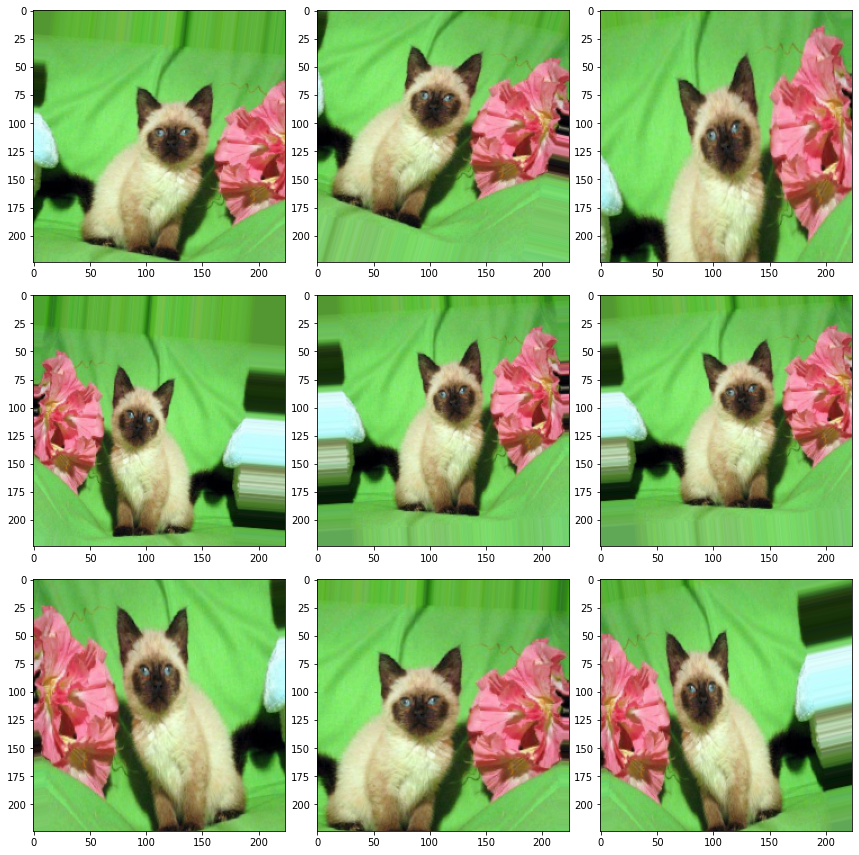

In [53]:
example_generator = train_datagen.flow_from_dataframe(
    df_train_example, 
    "./IM4483-Mini-Proj/train/", 
    x_col='filename',
    y_col='category',
    target_size=(image_size, image_size),
)

plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()